# **Reporte de Datos**
---

In [15]:
# Librerias
import os
import pandas as pd
import requests
import logging
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Funcion para crear el objeto de creación de logs
def create_logger():
  logging.basicConfig(level = logging.INFO, format = '%(asctime)s - %(levenname)s - %(message)s')
  logger = logging.getLogger('Logger')
  logger.info('Logger creado')
  return logger

In [17]:
# Función de consumo a la base de datos de Firebase para cargar el DataSet
def download_firebase(url, logger):
  logger.info("Extrayendo el archivo desde Firebase")
  df = None
  try:
    df = pd.read_csv(url)
    logger.info("Archivo cargado")
  except requests.exceptions.RequestException as e:
    logger.info(f"Error al descargar el archivo CSV: {e}")
  except pd.errors.EmptyDataError:
    logger.info("El archivo CSV está vacío.")
  except Exception as e:
    logger.info(f"Ocurrió un error inesperado: {e}")
  return df

In [18]:
# Cargar DataSet
url = 'https://firebasestorage.googleapis.com/v0/b/personalwp-8822c.appspot.com/o/diabetes_prediction_dataset.csv?alt=media&token=4d70d154-c3d0-4fa0-a3aa-9b9972dd3b95'
logger = create_logger()
df = download_firebase(url, logger)

## **Resumen de Calidad de los Datos**

### **Valores Atipicos**

<Axes: xlabel='age'>

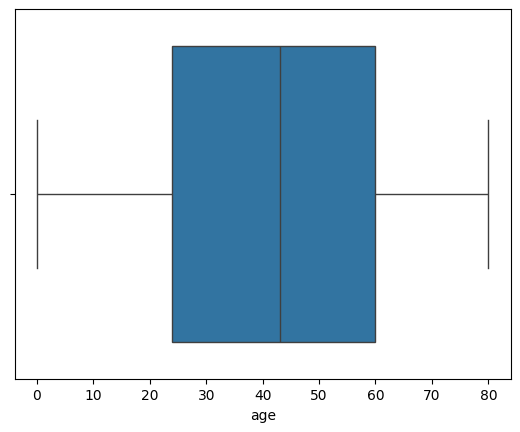

In [19]:
# Boxplot de 'age'
sns.boxplot(data = df, x = 'age')

<Axes: xlabel='bmi'>

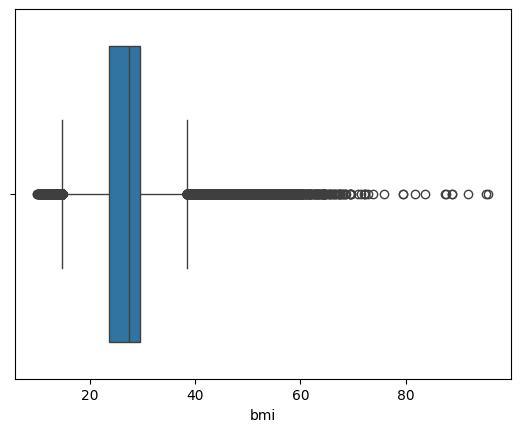

In [20]:
# Boxplot de 'bmi'
sns.boxplot(data = df, x = 'bmi')

<Axes: xlabel='HbA1c_level'>

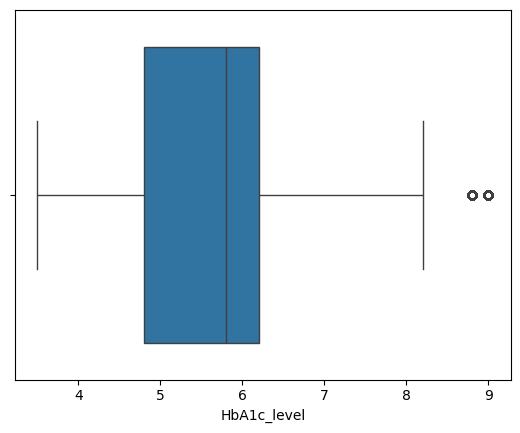

In [21]:
# Boxplot de 'HbA1c_level'
sns.boxplot(data = df, x = 'HbA1c_level')

<Axes: xlabel='blood_glucose_level'>

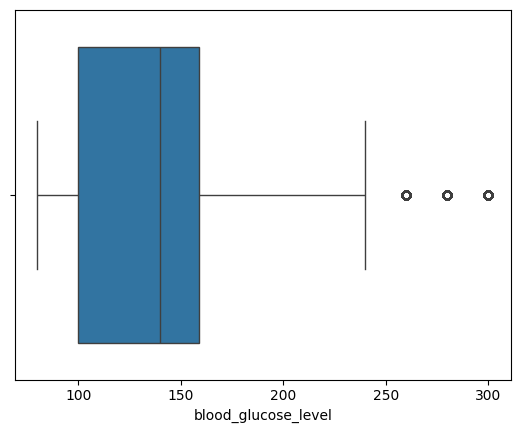

In [22]:
# Boxplot de 'blood_glucose_level'
sns.boxplot(data = df, x = 'blood_glucose_level')

In [34]:
# Valores atípicos en 'bmi'
seventy_fifth = df['bmi'].quantile(0.75)
twenty_fifth = df['bmi'].quantile(0.25)
iqr = seventy_fifth - twenty_fifth
upper = seventy_fifth + (10 * iqr)
lower = twenty_fifth - (10 * iqr)
outliers_bmi_upper = df[(df['bmi'] > upper)]
outliers_bmi_lower = df[(df['bmi'] < lower)]
print("Valores atipicos en 'bmi' upper: " + str(outliers_bmi_upper.shape[0]))
print("Valores atipicos en 'bmi' lower: " + str(outliers_bmi_lower.shape[0]))

Valores atipicos en 'bmi' upper: 3
Valores atipicos en 'bmi' lower: 0


In [33]:
# Valores atípicos en 'HbA1c_level'
seventy_fifth = df['HbA1c_level'].quantile(0.75)
twenty_fifth = df['HbA1c_level'].quantile(0.25)
iqr = seventy_fifth - twenty_fifth
upper = seventy_fifth + (10 * iqr)
lower = twenty_fifth - (10 * iqr)
outliers_HbA1c_level_upper = df[(df['HbA1c_level'] > upper)]
outliers_HbA1c_level_lower = df[(df['HbA1c_level'] < lower)]
print("Valores atipicos en 'HbA1c_level' upper: " + str(outliers_HbA1c_level_upper.shape[0]))
print("Valores atipicos en 'HbA1c_level' lower: " + str(outliers_HbA1c_level_lower.shape[0]))

Valores atipicos en 'HbA1c_level' upper: 0
Valores atipicos en 'HbA1c_level' lower: 0


In [32]:
# Valores atípicos en 'blood_glucose_level'
seventy_fifth = df['blood_glucose_level'].quantile(0.75)
twenty_fifth = df['blood_glucose_level'].quantile(0.25)
iqr = seventy_fifth - twenty_fifth
upper = seventy_fifth + (10 * iqr)
lower = twenty_fifth - (10 * iqr)
outliers_blood_glucose_level_upper = df[(df['blood_glucose_level'] > upper)]
outliers_blood_glucose_level_lower = df[(df['blood_glucose_level'] < lower)]
print("Valores atipicos en 'blood_glucose_level' upper: " + str(outliers_blood_glucose_level_upper.shape[0]))
print("Valores atipicos en 'blood_glucose_level' lower: " + str(outliers_blood_glucose_level_lower.shape[0]))

Valores atipicos en 'blood_glucose_level' upper: 0
Valores atipicos en 'blood_glucose_level' lower: 0


In [35]:
# Eliminación de valores atípicos en 'bmi'
df = pd.merge(df, outliers_bmi_upper, indicator = True, how = 'outer').query('_merge == "left_only"').drop('_merge', axis = 1)

In [37]:
# Información del DataSet
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99997 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99997 non-null  object 
 1   age                  99997 non-null  float64
 2   hypertension         99997 non-null  int64  
 3   heart_disease        99997 non-null  int64  
 4   smoking_history      99997 non-null  object 
 5   bmi                  99997 non-null  float64
 6   HbA1c_level          99997 non-null  float64
 7   blood_glucose_level  99997 non-null  int64  
 8   diabetes             99997 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.6+ MB


In [39]:
# Valores atípicos en 'bmi'
seventy_fifth = df['bmi'].quantile(0.75)
twenty_fifth = df['bmi'].quantile(0.25)
iqr = seventy_fifth - twenty_fifth
upper = seventy_fifth + (10 * iqr)
lower = twenty_fifth - (10 * iqr)
outliers_bmi_upper = df[(df['bmi'] > upper)]
outliers_bmi_lower = df[(df['bmi'] < lower)]
print("Valores atipicos en 'bmi' upper: " + str(outliers_bmi_upper.shape[0]))
print("Valores atipicos en 'bmi' lower: " + str(outliers_bmi_lower.shape[0]))

Valores atipicos en 'bmi' upper: 0
Valores atipicos en 'bmi' lower: 0


**Universidad Nacional de Colombia** - *Facultad de Ingeniería*